In [0]:
from random import randint
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import cm
import matplotlib.patches as mpatches

import matplotlib

import seaborn as sns
from random import random
import copy
import itertools

%matplotlib inline

In [0]:
# setting up a default plot style

def defaultPlotting():
    sns.set(rc={'figure.figsize': (20, 10)})
    sns.set_context("talk", rc={"font.size":22, "axes.titlesize":32, "axes.labelsize":20})
    plt.rcParams['axes.spines.bottom'] = False
    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['axes.spines.left'] = False
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['axes.titlesize'] = 18
    plt.rcParams['xtick.labelsize'] = 16
    plt.rcParams['ytick.labelsize'] = 16
    plt.rcParams['legend.fontsize'] = 16
    plt.rcParams['figure.titlesize'] = 32
    
defaultPlotting()

In [0]:
class Agent:
    def __init__(self):
        self.pool = None
        self.money = 100
        self.name = ""
        
    def increment(self, inc):
        self.money = self.money + inc
        
    def decrement(self, dec):
        self.money = self.money - dec
        
    def check(self, target, turn, tau):
        if (self.pool != target and turn != 0):
            self.decrement(tau)
            
    def get_name(self):
        return self.name
        
    def get_money(self):
        return self.money
    
    def get_pool(self):
        return self.pool
    
    def can_move(self, tau):
        return tau < self.money

# Agent Classes

In [0]:
class Safe(Agent):
    def __init__(self):
        super().__init__()
        self.name = "Safe"
        
    def move(self, turn, tau):
            if (self.pool != 'STABLE'):
                self.pool = 'STABLE'

In [0]:
class Random(Agent):
    def __init__(self):
        super().__init__()
        self.name = "Random"
        
    def move(self, turn, tau):
        pool_list = ['LOW', 'STABLE', 'HIGH']
        pool_index = randint(0,2)
        if (turn != 0 and self.can_move(tau)):
            self.check(pool_list[pool_index], turn, tau)
            self.pool = pool_list[pool_index]

In [0]:
class Gambler(Agent):
    def __init__(self):
        super().__init__()
        self.name = "Gambler"
        
    def move(self, turn, tau):
            if (self.pool != 'HIGH'):
                self.pool = 'HIGH'

In [0]:
class SemiGambler(Agent):
    def __init__(self):
        super().__init__()
        self.name = "Semi-Gambler"
        
    def move(self, turn, tau):
        if (turn != 0 and self.can_move(tau)):
            if (self.money < threshold):
                self.check('STABLE', turn, tau)
                self.pool = 'STABLE'
            else:
                self.check('HIGH', turn, tau)
                self.pool = 'HIGH'

In [0]:
class Greedy(Agent):
    def __init__(self):
        super().__init__()
        self.name = "Greedy"
        
    def move(self, turn, tau):
        if (turn != 0 and self.can_move(tau)):
            if (80 / high_history[len(high_history) - 1] if high_history[len(high_history) - 1] != 0 else 1 + 0 if self.pool == 'HIGH' else tau > 1 and 80 / high_history[len(high_history) - 1] if high_history[len(high_history) - 1] != 0 else 1 + 0 if self.pool == 'HIGH' else tau > 40 / low_history[len(low_history) - 1]) if low_history[len(low_history) - 1] != 0 else 1:
                self.check('HIGH', turn, tau)
                self.pool = 'HIGH'
            elif (1 + 0 if self.pool == 'STABLE' else tau > 80 / high_history[len(high_history) - 1] if high_history[len(high_history) - 1] != 0 else 1 and 1 + 0 if self.pool == 'STABLE' else tau > 40 / low_history[len(low_history) - 1]) if low_history[len(low_history) - 1] != 0 else 1:
                self.check('STABLE', turn, tau)
                self.pool = 'STABLE'
            else:
                self.check('LOW', turn, tau)
                self.pool = 'LOW'

In [0]:
class Desperate(Agent):
    def __init__(self):
        super().__init__()
        self.name = "Desperate"
        
    def move(self, turn, tau):
        if (turn != 0 and self.can_move(tau)):
            if (self.money < threshold):
                self.check('HIGH', turn, tau)
                self.pool = 'HIGH'
            else:
                self.check('STABLE', turn, tau)
                self.pool = 'STABLE'

In [0]:
class Sheep(Agent):
    def __init__(self):
        super().__init__()
        self.name = "Sheep"
        
    def move(self, turn, tau):
        if (turn != 0 and self.can_move(tau)):
            if (sum(low_history) > sum(stable_history) and sum(low_history) > sum(high_history)):
                self.check('LOW', turn, tau)
                self.pool = 'LOW'
            elif (sum(stable_history) > sum(low_history) and sum(stable_history) > sum(high_history)):
                self.check('STABLE', turn, tau)
                self.pool = 'STABLE'
            else:
                self.check('HIGH', turn, tau)
                self.pool = 'HIGH'

In [0]:
# Copycat - copies most successful agent

class Copycat(Agent):
    def __init__(self):
        super().__init__()
        self.name = "Copycat"
        
    def move(self, turn, tau):
        if(turn != 0 and self.can_move(tau)):
            best_agent = None
            best_agent_cash = 0
            agent_found = False
            for agent in people_list:
                if agent.money > best_agent_cash and type(agent) is not Copycat:
                    best_agent = copy.copy(agent)
                    best_agent_cash = agent.money
                    best_agent.pool = self.pool
                    best_agent.money = self.money
                    agent_found = True
            if not agent_found:
                self.check('STABLE', turn, tau)
                self.pool = 'STABLE'
            else:
                best_agent.move(turn, tau)
                self.check(best_agent.pool, turn, tau)
                self.pool = best_agent.pool
#                 print(best_agent)

In [0]:
# Hipster - chooses the pool with the least average payoff

class Hipster(Agent):
    def __init__(self):
        super().__init__()
        self.name = "Hipster"
        
    def move(self, turn, tau):
        if (turn != 0 and self.can_move(tau)):
            if (sum(low_history) < sum(stable_history) and sum(low_history) < sum(high_history)):
                self.check('LOW', turn, tau)
                self.pool = 'LOW'
            elif (sum(stable_history) < sum(low_history) and sum(stable_history) < sum(high_history)):
                self.check('STABLE', turn, tau)
                self.pool = 'STABLE'
            else:
                self.check('HIGH', turn, tau)
                self.pool = 'HIGH'

In [0]:
# Hedger - cycles through High -> Stable -> Low -> High -> ...

class Hedger(Agent):
    def __init__(self):
        super().__init__()
        self.name = "Hedger"
        
    def move(self, turn, tau):
        if (turn != 0 and self.can_move(tau)):
            if (turn % 3 == 0):
                self.check('STABLE', turn, tau)
                self.pool = 'STABLE'
            elif (turn % 3 == 1):
                self.check('HIGH', turn, tau)
                self.pool = 'HIGH'
            else:
                self.check('LOW', turn, tau)
                self.pool = 'LOW'

# Code

In [0]:
# when moving, check for turn number
# if not 0, tau applies
# 50 agents
# 100 timesteps

global threshold 
threshold = 30

In [0]:
people_list = []

for i in range(8):
    people_list.append(Random())
for i in range(8):
    people_list.append(Sheep())
for i in range(8):
    people_list.append(Safe())
for i in range(0):
    people_list.append(SemiGambler())
for i in range(0):
    people_list.append(Desperate())
for i in range(8):
    people_list.append(Greedy())
for i in range(8):
    people_list.append(Gambler())
for i in range(8):
    people_list.append(Copycat())
for i in range(8):
    people_list.append(Hipster())
for i in range(8):
    people_list.append(Hedger())

In [0]:
low_pool = []
stable_pool = []
high_pool = []

low_history = []
stable_history = []
high_history = []

# money = []
df = pd.DataFrame()

turn = 0
# bank = 0
tau = 0
low = False
high = False

In [0]:
while (turn < 100):
    bank = 0
    turn = turn + 1
    
    # record pool histories
    low_history.append(len(low_pool))
    stable_history.append(len(stable_pool))
    high_history.append(len(high_pool))
    
    # clear pools
    low_pool.clear()
    stable_pool.clear()
    high_pool.clear()
    
    # agents move
    for i, agent in enumerate(people_list):
        agent.move(turn, tau)
        bank = bank + agent.get_money()
        
        cur_row = (turn - 1) * 100
        df.at[cur_row + i, 'Agent Type'] = agent.get_name()
        df.at[cur_row + i, 'Turn'] = turn
        
        if (agent.get_pool() == 'LOW'):
            low_pool.append(agent)
            df.at[cur_row + i, 'Pool'] = 'Low'
            df.at[cur_row + i, 'Money'] = agent.get_money()
        elif (agent.get_pool() == 'STABLE'):
            stable_pool.append(agent)
            df.at[cur_row + i, 'Pool'] = 'Stable'
            df.at[cur_row + i, 'Money'] = agent.get_money()
        else:
            high_pool.append(agent)
            df.at[cur_row + i, 'Pool'] = 'High'
            df.at[cur_row + i, 'Money'] = agent.get_money()
        
    # earn money
    low = random() < 0.5
    for agent in low_pool:
        if (low):
            agent.increment(40 * 1.0 / len(low_pool))
        
    for agent in stable_pool:
        agent.increment(1)
        
    high = random() < 0.25
    for agent in high_pool:
        if (high):
            agent.increment(80 * 1.0 / len(high_pool))
        
    # print pools and money
#     money.append(bank)

In [18]:
df.head()

,Agent Type,Turn,Pool,Money
0,Random,1.0,High,100.0
1,Random,1.0,High,100.0
2,Random,1.0,High,100.0
3,Random,1.0,Low,100.0
4,Random,1.0,Low,100.0


# Graphs

---




## Average no. of switches per personality


In [0]:
# gets unique personality names in people_list

unique_p = set()

for agent in people_list:
    unique_p.add(agent.get_name())

In [0]:
# counts total number of agents per personality

pcounts = dict.fromkeys(unique_p, 0)

for agent in people_list:
    a_type = agent.get_name()
    
    if a_type in unique_p:
        pcounts[a_type] += 1

In [0]:
# gets the number of times an agent switched pools over 100 time steps

dfs = dict(tuple(df.groupby('Agent Type')))

personality = []
switch = []

for p in unique_p:
    size = pcounts[p]
    for i in range(0, size):
        if dfs[p].Pool.nunique() > 1:
            sliced = dfs[p].iloc[i::size, :]
            personality.append(sliced['Agent Type'])
            switch.append(sliced.Pool.ne(sliced.Pool.shift()))

In [0]:
# flatten list of lists

p_list = list(itertools.chain.from_iterable(personality))
s_list = list(itertools.chain.from_iterable(switch))

In [23]:
# make a new df based on values from the flattened list

s_df = pd.DataFrame({'Agent Type': p_list, 'Switch': s_list})
s_df.head()

,Agent Type,Switch
0,Copycat,True
1,Copycat,True
2,Copycat,False
3,Copycat,False
4,Copycat,True


In [0]:
s_count = s_df.groupby(['Agent Type', 'Switch']).size().reset_index(name='Count')

In [0]:
for i in s_count.index:
    if s_count.at[i, 'Switch'] == 'True':
        s_count.at[i, 'Count'] = s_count.at[i, 'Count'] - 1

In [26]:
s_count['Count'] = s_count['Count'] / 8 # assuming there are 8 agents per personality
s_count['Total'] = 100
s_count.head()

,Agent Type,Switch,Count,Total
0,Copycat,False,40.0,100
1,Copycat,True,60.0,100
2,Hedger,True,100.0,100
3,Hipster,False,80.0,100
4,Hipster,True,20.0,100


In [27]:
s_count = s_count.loc[s_count['Switch'] == True]

s_count = s_count.sort_values(by='Count', ascending=False).reset_index(drop=True)
s_count.head()

,Agent Type,Switch,Count,Total
0,Hedger,True,100.0,100
1,Random,True,67.0,100
2,Copycat,True,60.0,100
3,Hipster,True,20.0,100


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


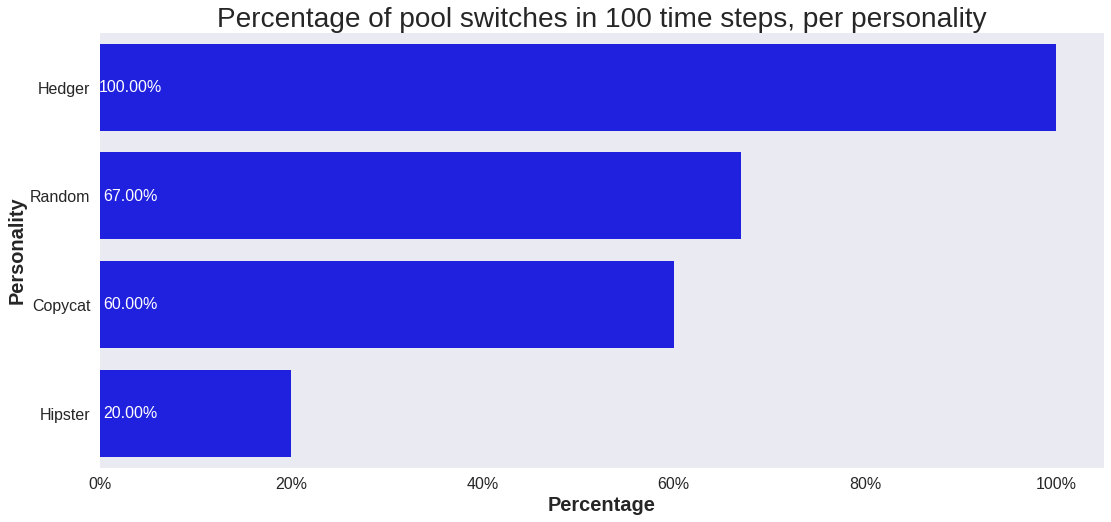

In [37]:
f, ax = plt.subplots(figsize=(18, 8))

sns.barplot(x="Count", y="Agent Type", data=s_count, ci=None, color='b')

ax.set_ylabel('Personality')
ax.set_xlabel('Percentage')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Percentage of pool switches in 100 time steps, per personality', fontsize=28)

for i, p in enumerate(ax.patches):
    left, bottom, width, height = p.get_bbox().bounds
    if width < 4:
        ax.annotate('{0:.2f}%'.format(width), (left + 3.25, bottom + height / 2), color='gray',
                ha='center', va='center', fontsize=16)
    else:
        ax.annotate('{0:.2f}%'.format(width), (left + 3.25, bottom + height / 2), color='white',
                ha='center', va='center', fontsize=16)

plt.grid(False)
# plt.savefig('switches - tau 0.png', bbox_inches="tight", dpi=300)

*the rest of the personalities: 0 switches*




## Average amount of money earned per personality in each time step

In [29]:
m_avg = df.groupby(['Agent Type', 'Turn']).mean().reset_index()
m_avg.head()

,Agent Type,Turn,Money
0,Copycat,1.0,100.000000
1,Copycat,2.0,100.852273
2,Copycat,3.0,101.754447
3,Copycat,4.0,102.004447
4,Copycat,5.0,102.004447


In [30]:
for i, (name, group) in enumerate(m_avg.groupby('Agent Type')):
    print(group)

   Agent Type   Turn       Money
0     Copycat    1.0  100.000000
1     Copycat    2.0  100.852273
2     Copycat    3.0  101.754447
3     Copycat    4.0  102.004447
4     Copycat    5.0  102.004447
5     Copycat    6.0  103.129447
6     Copycat    7.0  104.788929
7     Copycat    8.0  104.913929
8     Copycat    9.0  106.089855
9     Copycat   10.0  110.631522
10    Copycat   11.0  112.089855
11    Copycat   12.0  112.589855
12    Copycat   13.0  113.554141
13    Copycat   14.0  113.804141
14    Copycat   15.0  114.679141
15    Copycat   16.0  116.179141
16    Copycat   17.0  116.804141
17    Copycat   18.0  117.968615
18    Copycat   19.0  118.468615
19    Copycat   20.0  119.093615
20    Copycat   21.0  120.119931
21    Copycat   22.0  122.048502
22    Copycat   23.0  122.048502
23    Copycat   24.0  122.048502
24    Copycat   25.0  124.387788
25    Copycat   26.0  124.637788
26    Copycat   27.0  125.250883
27    Copycat   28.0  125.500883
28    Copycat   29.0  127.000883
29    Copy

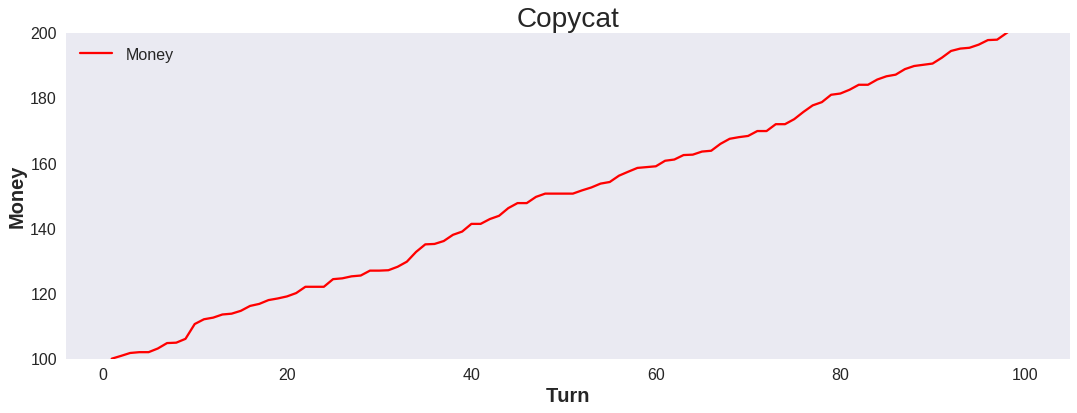

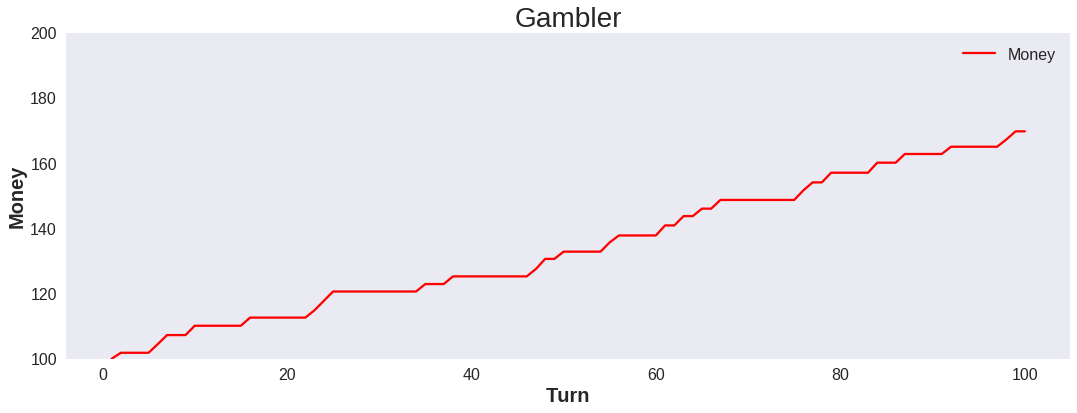

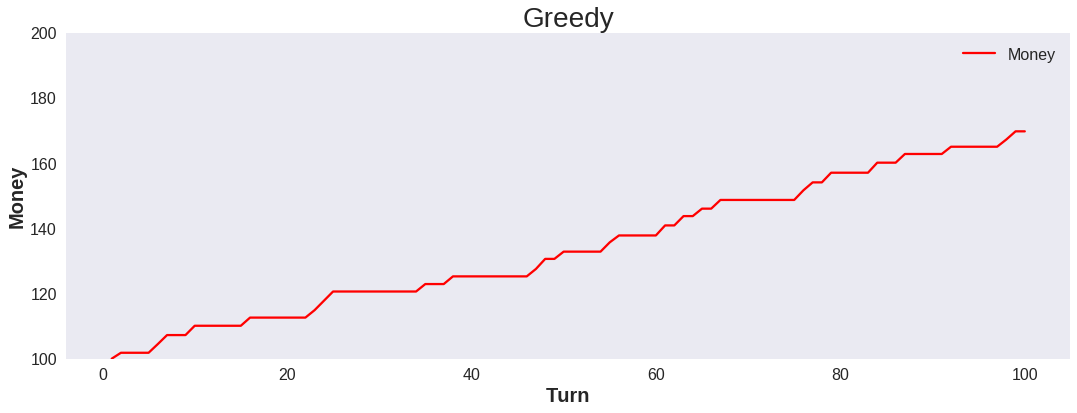

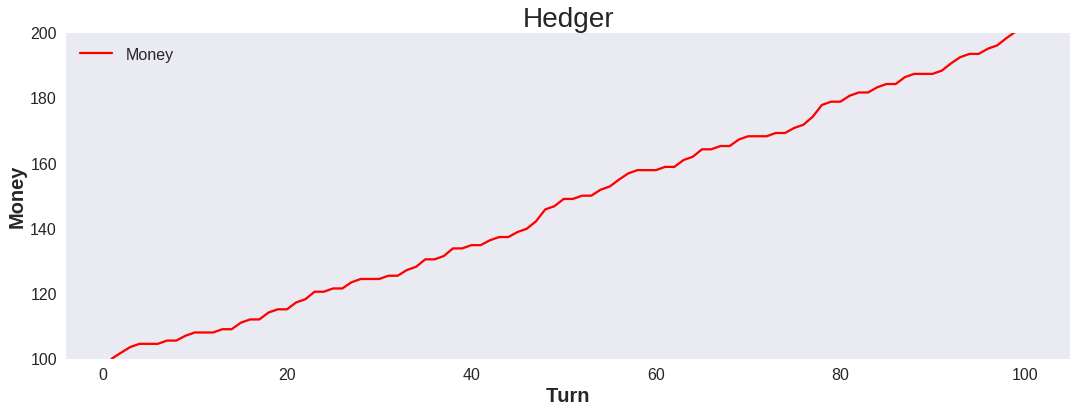

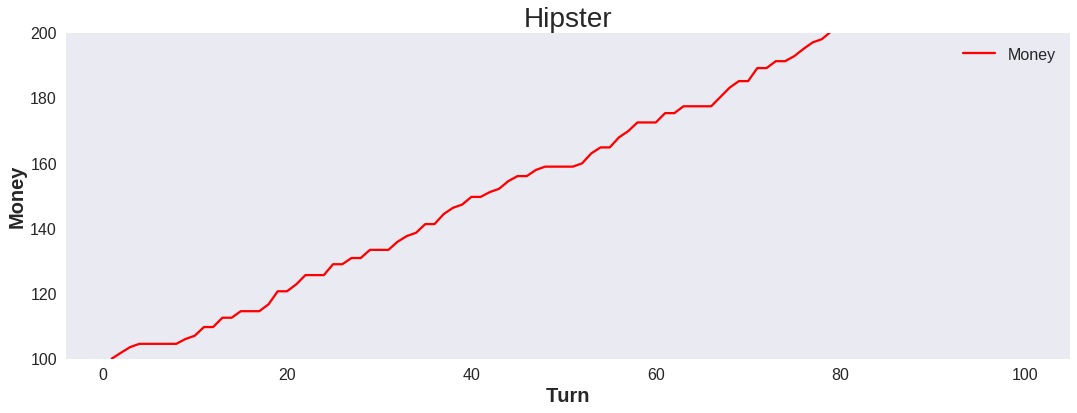

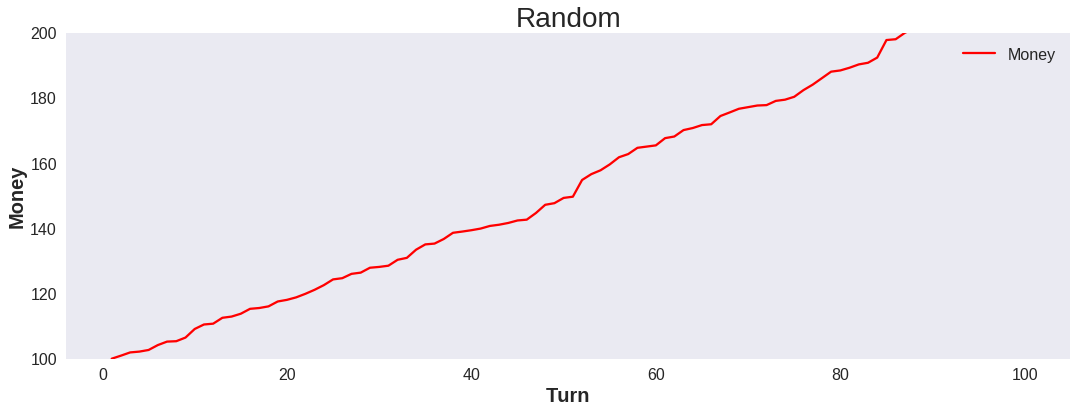

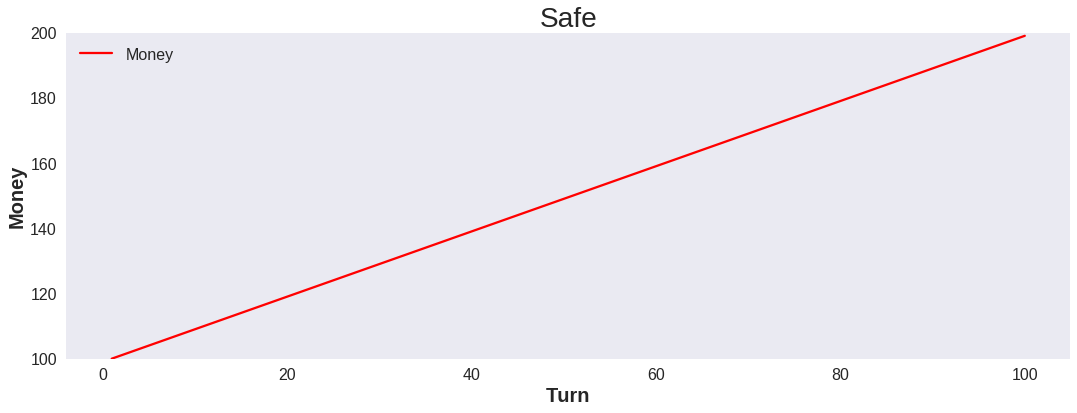

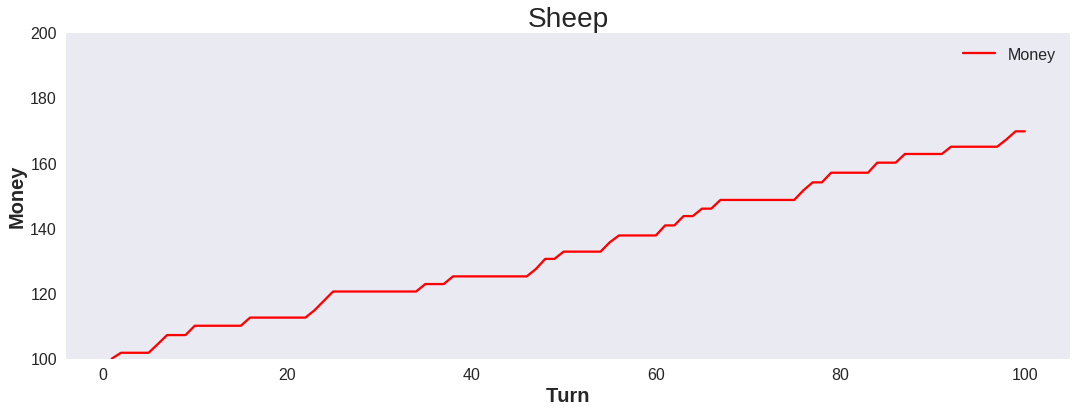

In [31]:
for name, group in m_avg.groupby('Agent Type'):
    fig = plt.figure(figsize=(18, 6))
    ax1 = fig.add_subplot(111)
    group.plot.line(ax=ax1, ylim=[100, 200], color='red', x="Turn", y="Money")
    ax1.set_ylabel('Money')
    plt.title(str(name), fontsize=28)
    plt.grid(False)

In [0]:
cmap = cm.get_cmap('Set3', 10)
colors = []

for i in range(cmap.N):
    rgb = cmap(i)[:3]
    colors.append(matplotlib.colors.rgb2hex(rgb))

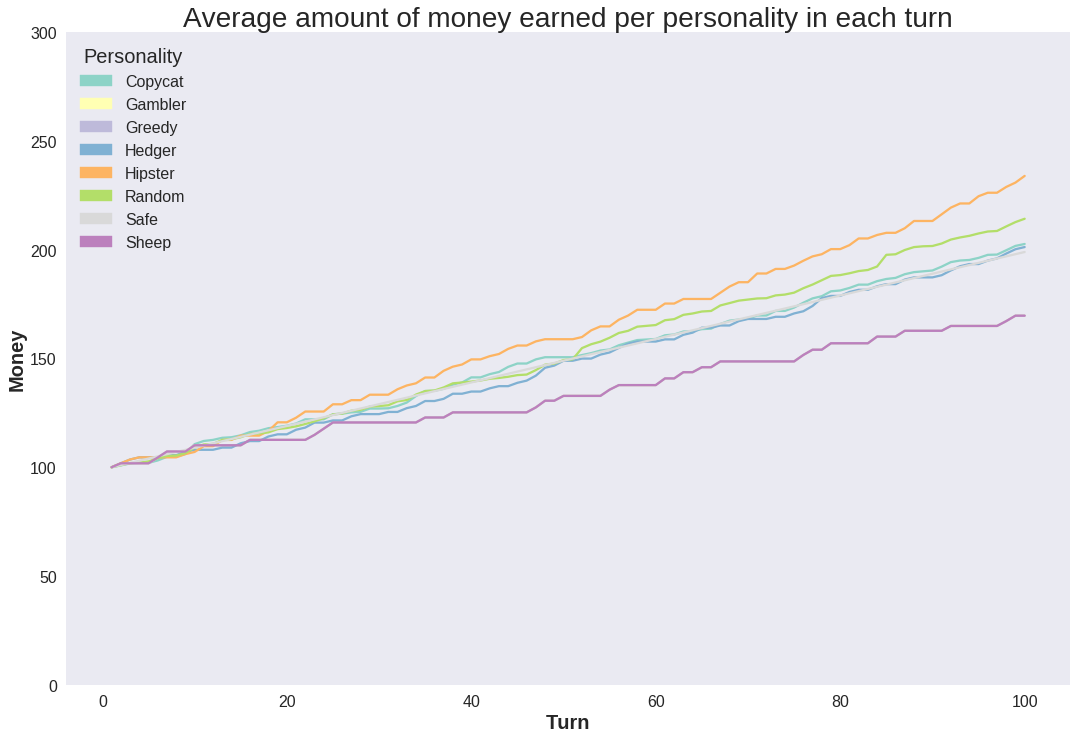

In [33]:
legend_dict = {}

fig, ax = plt.subplots(figsize=(18, 12))

for i, (name, group) in enumerate(m_avg.groupby('Agent Type')):
    group.plot.line(ax=ax, ylim=[0, 300], color=colors[i], x="Turn", y="Money")
    legend_dict.update({name:colors[i]})

patchList = []

for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

legend = plt.legend(title='Personality', handles=patchList)
legend.get_title().set_fontsize('20')
plt.ylabel('Money')
plt.title('Average amount of money earned per personality in each turn', fontsize=28)

plt.grid(False)
# plt.savefig('money - tau 0.png', bbox_inches="tight", dpi=300)

## No. of agents per pool


In [34]:
pool_count = df.groupby(['Turn', 'Pool']).size().reset_index(name='Count')
pool_count.head()

,Turn,Pool,Count
0,1.0,High,44
1,1.0,Low,5
2,1.0,Stable,15
3,2.0,High,30
4,2.0,Low,23


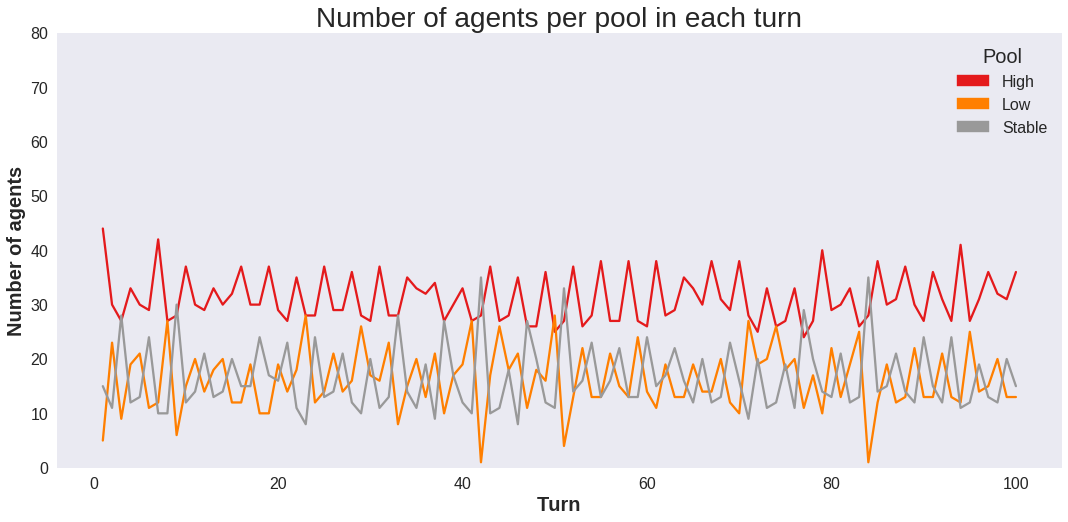

In [35]:
cmap = cm.get_cmap('Set1', 3)
colors = []

for i in range(cmap.N):
    rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
    colors.append(matplotlib.colors.rgb2hex(rgb))

legend_dict = {}

fig, ax = plt.subplots(figsize=(18, 8))

for i, (name, group) in enumerate(pool_count.groupby('Pool')):
    group.plot.line(ax=ax, ylim=[0, 80], color=colors[i], x="Turn", y="Count")
    legend_dict.update({name:colors[i]})

patchList = []

for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

legend = plt.legend(title='Pool', handles=patchList)
legend.get_title().set_fontsize('20')
plt.ylabel('Number of agents')
plt.title('Number of agents per pool in each turn', fontsize=28)

plt.grid(False)
plt.savefig('pool - tau 0.png', bbox_inches="tight", dpi=300)